### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [2]:
df = pd.read_csv("AMES_Final_DF.csv")

In [3]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [5]:
df['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2920    142500
2921    131000
2922    132000
2923    170000
2924    188000
Name: SalePrice, Length: 2925, dtype: int64

**Мы будем пытаться спрогнозировать значение колонки SalePrice. Разделим данные на две части - признаки X и целевая переменная y**

In [6]:
y = df['SalePrice']
X = df.drop('SalePrice', axis = 1)

**С помощью scikit-learn разделим и X, и y на обучающий и тестовый наборы данных. Поскольку далее мы будем использовать поиск по сетке, то выделим под тестовые данные 10% от всех данных.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(\
               X, y, test_size=0.1, random_state=101)

**Признаки в этом наборе данных имеют различный масштаб и различные единицы измерения. Для оптимальной работы регрессии, выполним масштабирование признаков X.**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
from sklearn.linear_model import ElasticNet

In [122]:
el_net_model = ElasticNet(max_iter = 1000000)

**Модель Elastic Net работает с двумя основными параметрами - alpha и L1_ratio. Создаём словарь с набором различных значений этих параметров, для поиска по сетке.**

In [123]:
param = {'alpha':[0.1,1,5,10,50,100],
          'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_model = GridSearchCV(estimator = el_net_model, param_grid = param,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, 
                         verbose = 1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [124]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=1000000)

**Мы видим, что лучшее значение параметра alpha найдено на правой границе выбранного интервала, предположим, что можно найти лучше и попробуем выбрать другой диапазон величины**

In [30]:
param_2 = {'alpha':[100, 125, 150, 200, 1000],
          'l1_ratio':[1]}

In [31]:
grid_model_2 = GridSearchCV(estimator = el_net_model, param_grid = param_2,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, 
                         verbose = 2)
grid_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=125, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=125, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=125, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=125, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=125, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=150, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=150,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [100, 125, 150, 200, 1000], 'l1_ratio': [1]},
             scoring='neg_mean_squared_error', verbose=2)

**Наилучшуя комбинация параметров для модели.**

In [125]:
grid_model_2.best_estimator_

ElasticNet(alpha=125, l1_ratio=1, max_iter=1000000)

**ЗАДАНИЕ: Оцените работу модели на тестовом наборе данных (предварительно смасштабированном) в 10%, которые модель ещё не видела. В блокноте с решениями мы получили MAE = $\$$14149 и RMSE = $\$$20532**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [126]:
df['SalePrice'].mean()

180815.53743589742

In [131]:
y_test_final = grid_model_2.predict(X_test)

In [132]:
 mean_absolute_error(y_test, y_test_final)

14185.506207185057

In [133]:
np.sqrt(mean_squared_error(y_test, y_test_final))

20560.020854052425

## Изучим графики ошибок

----

In [38]:
test_residuals = y_test - y_test_final_2

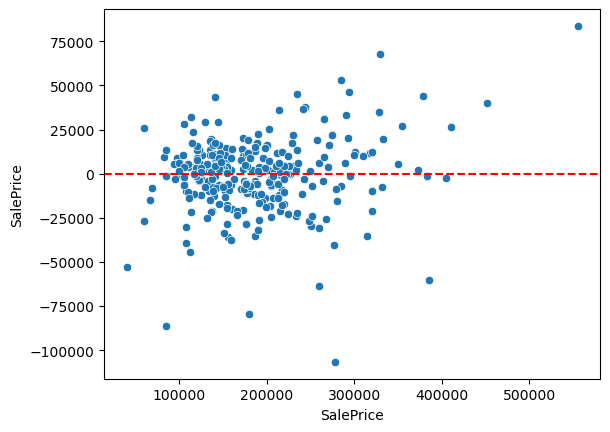

In [39]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

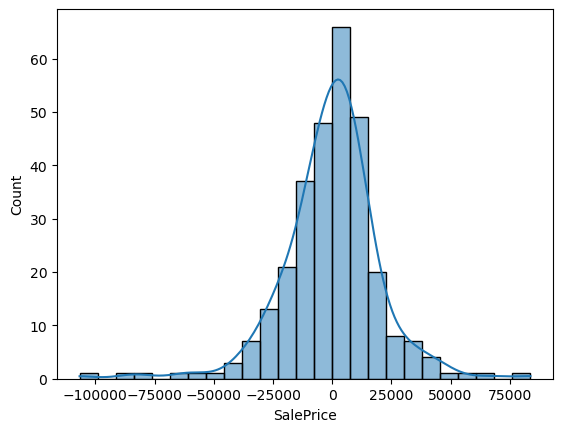

In [40]:
sns.histplot(test_residuals, bins = 25, kde = True)

# Попробуем упростить модель за счёт удаления признаков с нулевыми коэффициентами

In [52]:
from sklearn.linear_model import Lasso

In [53]:
grid_model_2.best_estimator_

ElasticNet(alpha=125, l1_ratio=1, max_iter=1000000)

In [64]:
Lasso_model = Lasso(alpha=125, max_iter = 1000000)

In [65]:
Lasso_model.fit(X_train, y_train)

Lasso(alpha=125, max_iter=1000000)

Посмотрим, какие признаки можно не принимать в расчёт

In [110]:
y_test_final_lasso = Lasso_model.predict(X_test)
zero_col = np.where(Lasso_model.coef_ == 0)[0]
df[df.columns[zero_col]].columns

Index(['Bsmt Unf SF', '1st Flr SF', 'TotRms AbvGrd', 'Garage Yr Blt',
       '3Ssn Porch', 'MS SubClass_160', 'MS SubClass_50', 'MS SubClass_70',
       'MS SubClass_75', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_I (all)', 'Lot Shape_IR2', 'Lot Config_FR2',
       'Neighborhood_GrnHill', 'Condition 2_Feedr', 'Condition 2_PosA',
       'Condition 2_RRAe', 'Bldg Type_TwnhsE', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl', 'Roof Style_Gable',
       'Roof Style_Mansard', 'Roof Matl_Metal', 'Roof Matl_WdShngl',
       'Exterior 1st_AsphShn', 'Exterior 1st_BrkFace', 'Exterior 1st_Stucco',
       'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 2nd_AsphShn',
       'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd',
       'Exterior 2nd_ImStucc', 'Exterior 2nd_Stone', 'Exterior 2nd_VinylSd',
       'Exter Cond_Fa', 'Exter Cond_Po', 'Foundation_PConc', 'Bsmt Qual_Gd',
       'Bsmt Qual_TA', 'Bsmt Cond_Fa', 'Bsmt Cond_Gd', 'Bsmt 

In [111]:
X_new = X.drop(X.columns [zero_col] , axis = 1)
X_new.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Total Bsmt SF',
       ...
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=203)

In [93]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(\
               X_new, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)


In [95]:
param = {'alpha':[0.1,1,5,10,50,100],
          'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [96]:
el_net_model_new = ElasticNet()

In [97]:
grid_model_new = GridSearchCV(estimator = el_net_model, param_grid = param,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, 
                         verbose = 1)
grid_model_new.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [98]:
grid_model_new.best_params_

{'alpha': 1, 'l1_ratio': 0.99}

In [101]:
y_pred_new = grid_model_new.predict(X_test_new)

In [102]:
mean_absolute_error(y_test_new, y_pred_new)

14342.810857221217

In [105]:
np.sqrt(mean_squared_error(y_test_new, y_pred_new))

20789.14440042846

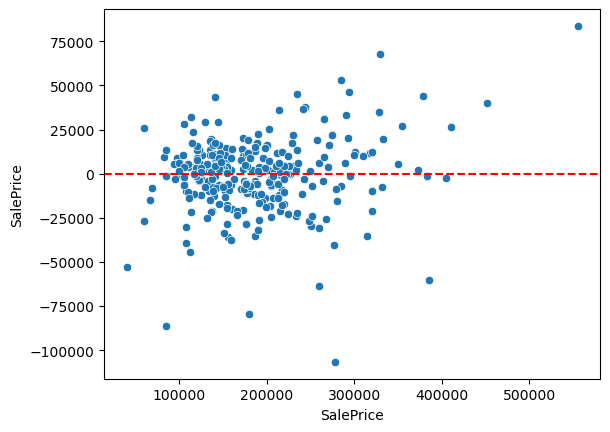

In [112]:
test_residuals = y_test - y_test_final_2
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')

# Видим, что точночность немного упала. То, какую модель стоит использовать, зависит от требований к ней